The purpose of this assignment is to develop a model to predict a player’s rank using the information provided in the
dataset.

Importing Necessary Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn

In [131]:
import seaborn as sns


Loading the dataset 

In [132]:
starcraft_data = pd.read_csv('starcraft_player_data.csv', low_memory = False)

In [133]:
starcraft_data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [134]:
starcraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

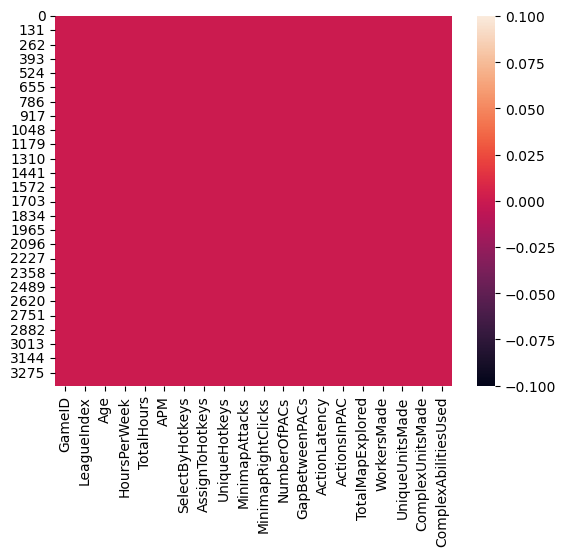

In [135]:
sns.heatmap(starcraft_data.isnull())
plt.show()

In [136]:
starcraft_data.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [137]:
starcraft_data.drop(columns= ['GameID' , 'AssignToHotkeys', 'UniqueHotkeys'], inplace = True)


In [138]:
starcraft_data.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27,10,3000,143.7180,0.003515,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,5,23,10,5000,129.2322,0.003304,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,4,30,10,200,69.9612,0.001101,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,19,20,400,107.6016,0.001034,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,3,32,10,500,122.8908,0.001136,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


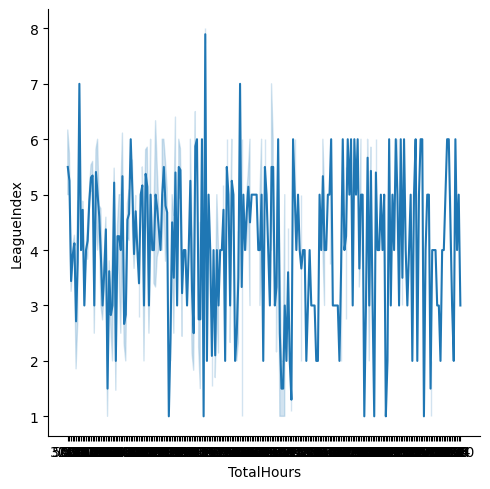

In [139]:
sns.relplot(x=starcraft_data['TotalHours'], y=starcraft_data['LeagueIndex'],kind = 'line', sort =False, data = starcraft_data)

Graphing Total Hours v League index, there is no direct correlation between the amount of time a player spends playing the game and their rank.

<AxesSubplot:xlabel='GapBetweenPACs', ylabel='LeagueIndex'>

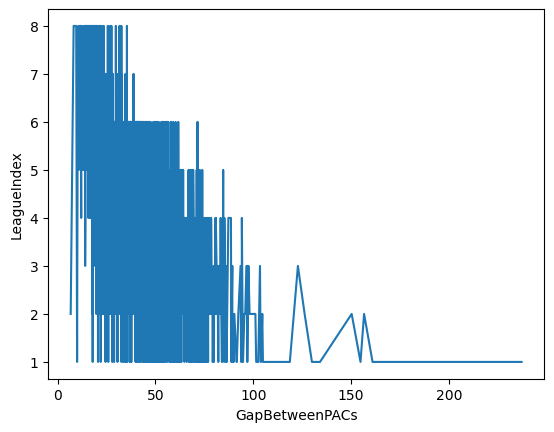

In [140]:
sns.lineplot(x=starcraft_data['GapBetweenPACs'],y=starcraft_data['LeagueIndex'])

The graph indicates that the smaller the gap between PACS, the higher the maximum rank of player is

<AxesSubplot:xlabel='ActionsInPAC', ylabel='LeagueIndex'>

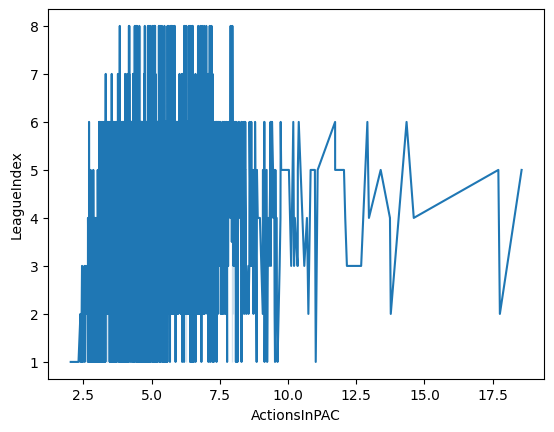

In [141]:
sns.lineplot(x=starcraft_data['ActionsInPAC'],y=starcraft_data['LeagueIndex'])

The highest ranking players average between 3 and 7.5 actions per PAC

<AxesSubplot:xlabel='APM', ylabel='LeagueIndex'>

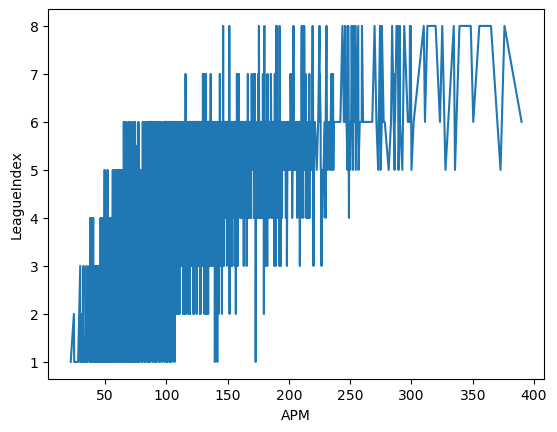

In [142]:
sns.lineplot(x=starcraft_data['APM'],y=starcraft_data['LeagueIndex'])

The higher the average actions per minute, the higher the maximum of a player is 

<AxesSubplot:xlabel='MinimapAttacks', ylabel='LeagueIndex'>

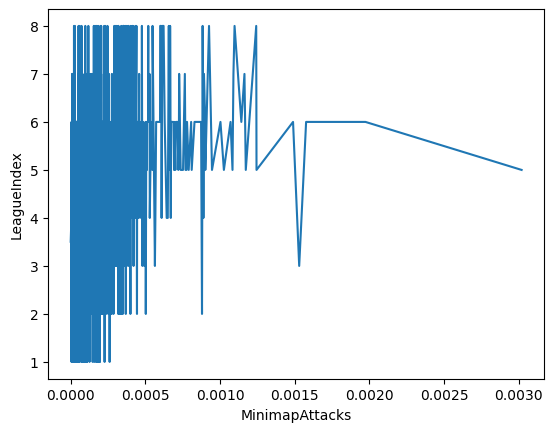

In [143]:
sns.lineplot(x=starcraft_data['MinimapAttacks'], y=starcraft_data['LeagueIndex'])

This series of lineplots illustrates the three cateristics that seem to most affect rank. APM,ActionsinPAC, & GapsBetweenPACS

Developing a model to predict someones rank based on the data.

In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [155]:
X= starcraft_data[['APM', 'ActionsInPAC', 'GapBetweenPACs']] 
Y= starcraft_data[['LeagueIndex']]  

In [156]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.001,random_state=10)

In [157]:
logreg= LogisticRegression(max_iter=100000)
logreg.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=100000)

In [158]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

           APM  ActionsInPAC  GapBetweenPACs
1719  113.8716        5.3686         34.3297
2750   84.1884        3.5187         36.4718
708   145.8528        6.2393         23.9138
1150  104.0040        7.4217         42.2061
[5 4 5 4]


In [159]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.75
CL Report:               precision    recall  f1-score   support

           4       1.00      0.67      0.80         3
           5       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



Starcraft is broken up into the following ranks. Bronze, Silver, Gold, Platinum, Diamond, Master,GrandMaster, and Professional leagues. 

These are coded 1 - 8 respectively.

When graphing the relationship between Ranks and other factors, there were three categories that yeilded the highest accuracy in terms of relationships between Rank and the category.

APM : According to the line plot, the higher the actions per minute, the higher the average rank tended to be

ActionsinPAC: Players with the highest rank tend to have an average mean action in each PAC between 3 and 8

GapBetweenPACs: Players yeilding the highest ranks tend to have the smallest gaps between each PAC.

A PAC basically consists of a shift of the screen to a new location for some time, followed by at least one action (typically 4-6). The more actions per minute with an avg number of actions of 3 to 8, with minimal gaps in between each PAC typically yeilds the highest ranks.